## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [9]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


## Загружаем исходные данные

In [10]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [12]:
X = train[:, 1:]
labels = train[:, 0]

In [37]:
#PCA
print(X.shape, test.shape)
data = np.concatenate((X, test), axis=0)
data.shape
# центрируем данные
data_mean = data.mean(axis=0)
data_center = data - data_mean
# матрица ковариации признаков
cov = np.dot(data_center.T, data_center) / data_center.shape[0]
U, S, _ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

# накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)

S_thr = 0.75  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

# получаем сжатое представление объектов
data_reduced = np.dot(data_center, U[:, :n_comp])
print(data_reduced.shape)
print(data.shape)
X_reduced = data_reduced[:X.shape[0], :]
test_reduced = data_reduced[X.shape[0]:, :]

(42000, 784) (28000, 784)
n_comp=32 S=0.751
(70000, 32)
(70000, 784)


In [38]:
X_train, X_val, y_train, y_val = train_test_split(X_reduced, labels, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=25)
rfc.fit(X_train, y_train)
pred_val = rfc.predict(X_val)

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.9341904761904762


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1025
         1.0       0.97      0.99      0.98      1146
         2.0       0.94      0.93      0.93      1072
         3.0       0.92      0.89      0.91      1151
         4.0       0.93      0.93      0.93      1024
         5.0       0.90      0.93      0.91       898
         6.0       0.95      0.96      0.96      1010
         7.0       0.95      0.94      0.94      1135
         8.0       0.92      0.90      0.91      1005
         9.0       0.91      0.89      0.90      1034

   micro avg       0.93      0.93      0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[1001    0    3    1    3    4   10    0    3    0]
 [   0 1130    6    1    1    4    2    0    2    0]
 [  15    6  994   14    8    2    6    8   15    4]
 [   5    2   19 1030    1   31    4   12   30   17]
 [   1    4    5    1  954    1   13    4    5   36]
 [   1    0    4   19    7  837   10    2   12    6]
 [  15    0    1    1    6    9  974    0    4    0]
 [   1   11   16    1    8    1    0 1065    5   27]
 [   4    4    6   36    8   34    4    3  900    6]
 [   5    2    5   20   33    9    3   28    5  924]]


## Предсказания на тестовыйх данных

In [46]:
pred_test = rfc.predict(test_reduced).astype(int)

## Визуализируем предсказания

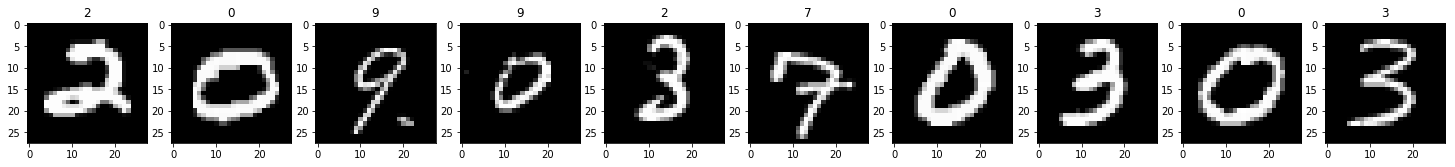

In [47]:
test_img = np.reshape(test[:, :], (len(test[:, :]), 28, 28))
fig = plt.figure(figsize=(28, 28))
for i, img in enumerate(test_img[0:10], 1):
    subplot = fig.add_subplot(1, 11, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [48]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [45]:
!head submit.txt

"head" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
